# Real-world Data Wrangling

In this project, I will analyze birth and death statistics between 2014~2021 in CA, US.
The statistical data is obtained from California Health and Human Services Open Data Portal. 


## 1. Gather data

The statistical data is obtained from California Health and Human Services Open Data Portal (CalHHS ODP). For each data set, download URL is given in the web-site. Through that URL, statistical data can easily be programmatically downloaded. 

### **1.1.** Problem Statement
Throughout this project, I want to analyze birth and death statistics between 2014~2021 in CA, US. CalHHS ODP provide different data sheets for birth and death statistics. I will download both of them, check the exisitng data, perform the data cleaning, and analyze the meaningful data. 

URL for each statistical data can be found in the web site. 
URL for Birth statistics (monthly): 
https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=b990913a-d2a1-4b28-a740-45b7967dc610

URL for Death statistics (monthly):
https://data.chhs.ca.gov/dataset/7a456555-87b9-4830-817c-72d72e628745/resource/fb447a28-48e4-497a-8efb-e88f81a956c7/download/20221215_deaths_final_2014_2021_state_month_sup.csv


Next imports - necessary libraries for this project. 

In [1]:
# required libraries 

import requests
from urllib.request import urlopen
import json
import pandas as pd

### Questions to be answered
*   What is the statistics for birth: do the people in CA prefer to give a birth at home or at hospital?
*   What is the statistics for death: based on place/gender?
*   How birth and death statistics changed overtime? (last 8 years)


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Birth statistics of CA, USA for 1960~2021 by month**

Type: *JSON*

Method: *Data is gathered using API from CalHHS ODP*

Dataset variables:

*   *_id* - unique ID.
*   *Year* - Four-digit year in which the event occurred.
*   *Month* - Two-digit month in which the event occurred. 
*   *Geography_Type* - Whether the geography is based on the place of residence or place of occurrence. A geography type of Residence includes events for California residents even if they occurred outside of California, whereas a geography type of Occurrence includes events that occurred within California even if they were not California residents.
*   *Strata* - General demographic or detail category under which events have been stratified. For example, Race-Ethnicity or Gender. Will be Total Population if there is no stratification.
*   *Strata_Name* - Individual strata within the general demographic or detail category. For example, Hispanic or Female. Will be Total Population if there is no stratification.
*   *Count* - Count of events. If blank, see annotation for more information.
*   *Annotation_Code* - Annotation code for count as single digit:
**blank** = no annotation
**1** = cell suppressed for small numbers
**2** = cell suppressed for complementary cell
**3** = no data is available
**4** = statistically unstable value
*   *Annotation_Desc* - Descriptive text for the data annotation.
*   *Data_Revision_Date* - Date data was created or revised (MM/DD/YYYY).

In [2]:
# 1st data gathering and loading method
url = 'https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=b990913a-d2a1-4b28-a740-45b7967dc610&limit=2000'

fileobj = urlopen(url)
response_dict = json.loads(fileobj.read())


birth_df = pd.json_normalize(response_dict['result']['records'])
birth_df.head(5)

,_id,Year,Month,Geography_Type,Strata,Strata_Name,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
0,1,1960,01,Occurrence,Total Population,Total Population,28830,None,None,11/04/2022
1,2,1960,01,Residence,Total Population,Total Population,28838,None,None,11/04/2022
2,3,1960,02,Occurrence,Total Population,Total Population,27873,None,None,11/04/2022
3,4,1960,02,Residence,Total Population,Total Population,27913,None,None,11/04/2022
4,5,1960,03,Occurrence,Total Population,Total Population,29984,None,None,11/04/2022


#### **Death statistics of CA, USA for 2014~2021 by month**

Type: *CSV*

Method: *The data was directly downloaded and saved*

Dataset variables:

*   *Year* - Four-digit year in which the event occurred.
*   *Month* - Two-digit month in which the event occurred.
*   *Geography_Type* - Whether the geography is based on the place of residence or place of occurrence. A geography type of Residence includes events for California residents even if they occurred outside of California, whereas a geography type of Occurrence includes events that occurred within California even if they were not California residents.
*   *Strata* - General demographic or detail category under which events have been stratified. For example, Race-Ethnicity or Gender. Will be Total Population if there is no stratification other than underlying cause of death.
*   *Strata_Name* - Individual strata within the general demographic or detail category. For example, Hispanic or Female. Will be Total Population if there is no stratification other than underlying cause of death.
*   *Cause* - Provided as a three-character code:
**ALL** = All causes (total)
**ALZ** = Alzheimer's disease [G30]
**CAN** = Malignant neoplasms (cancers) [C00-C97]
**CLD** = Chronic lower respiratory disease (CLRD) [J40-J47]
**DIA** = Diabetes mellitus [E10-E14]
**HOM** = Assault (homicide) [*U01-*U02, X85-Y09, Y87.1]
**HTD** = Diseases of heart [I00-I09, I11, I13, I20-I51]
**HYP** = Essential hypertension and hypertensive renal disease [I10, I12, I15]
**INJ** = Accidents (unintentional injuries) [V01-X59, Y85-Y86]
**LIV** = Chronic liver disease and cirrhosis [K70, K73-K74]
**NEP** = Nephritis, nephrotic syndrome and nephrosis [N00-N07, N17-N19, N25-N27]
**vPAR** = Parkinson's disease [G20-G21]
**PNF** = Pneumonia and influenza [J09-J18]
**STK** = Cerebrovascular disease (stroke) [I60-I69]
**SUI** = Intentional self-harm (suicide) [*U03, X60-X84, Y87.0]

*   *Cause_Desc* - Descriptive text for the underlying cause of death category.
*   *ICD_Revision* - International Classification of Diseases codes 
*   *Count* - Count of events. If blank, see annotation for more information.
*   *Annotation_Code* - Annotation code for count as single digit:
blank = no annotation
1 = cell suppressed for small numbers
2 = cell suppressed for complementary cell
3 = no data is available
4 = statistically unstable value

*   *Annotation_Desc* - Descriptive text for the data annotation.
*   *Data_Revision_Date* - Date data was created or revised (MM/DD/YYYY).

In [3]:
#2nd data gathering and loading method
#FILL IN - extract a dataset via direct downloading
url = "https://data.chhs.ca.gov/dataset/7a456555-87b9-4830-817c-72d72e628745/resource/fb447a28-48e4-497a-8efb-e88f81a956c7/download/20221215_deaths_final_2014_2021_state_month_sup.csv"
filename = 'death_statistics_raw.csv'

# download the file. !!! It may take some time.
try: 
    resp = urlopen(url)
    with open(filename, 'wb') as f:
        f.write(resp.read())
except (urllib2.URLError, urllib2.HTTPError, httplib.HTTPException) as e:
    print(e)
    exit()

# read downloaded file
death_df = pd.read_csv(filename)
death_df.head(5)

,Year,Month,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
0,2014,1,Occurrence,Total Population,Total Population,ALL,All causes (total),ICD-10,23896.0,NaN,NaN,12/15/2022
1,2014,1,Occurrence,Age,Under 1 year,ALL,All causes (total),ICD-10,185.0,NaN,NaN,12/15/2022
2,2014,1,Occurrence,Age,1-4 years,ALL,All causes (total),ICD-10,30.0,NaN,NaN,12/15/2022
3,2014,1,Occurrence,Age,5-14 years,ALL,All causes (total),ICD-10,47.0,NaN,NaN,12/15/2022
4,2014,1,Occurrence,Age,15-24 years,ALL,All causes (total),ICD-10,268.0,NaN,NaN,12/15/2022


When we gather birth statistical data, we get it though API and read directly from JSON, while death statistical data has been downloaded (and saved as an original file). Let's save the raw birth statistical data as well.

In [4]:
#store the raw data in your local data store
birth_df.to_csv('birth_statistics_raw.csv')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.


### Quality Issue 1:

In [5]:
# Inspecting the birth dataframe
birth_df.sample(10)

,_id,Year,Month,Geography_Type,Strata,Strata_Name,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
1033,1034,2003,01,Residence,Total Population,Total Population,44162,None,None,11/04/2022
143,144,1965,12,Residence,Total Population,Total Population,29195,None,None,11/04/2022
981,982,2000,11,Residence,Total Population,Total Population,44943,None,None,11/04/2022
1580,1581,2019,07,Residence,Place Type,Home,261,None,None,11/04/2022
1145,1146,2007,09,Residence,Total Population,Total Population,49731,None,None,11/04/2022
466,467,1979,06,Occurrence,Total Population,Total Population,31050,None,None,11/04/2022
1043,1044,2003,06,Residence,Total Population,Total Population,44169,None,None,11/04/2022
646,647,1986,12,Occurrence,Total Population,Total Population,40229,None,None,11/04/2022
1846,1847,2021,10,Occurrence,Place Type,Other/Unknown,59,None,None,11/04/2022
121,122,1965,01,Residence,Total Population,Total Population,29000,None,None,11/04/2022


In [6]:
# Inspecting the birth dataframe 
birth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 1872 non-null   int64 
 1   Year                1872 non-null   object
 2   Month               1872 non-null   object
 3   Geography_Type      1872 non-null   object
 4   Strata              1872 non-null   object
 5   Strata_Name         1872 non-null   object
 6   Count               1872 non-null   int64 
 7   Annotation_Code     0 non-null      object
 8   Annotation_Desc     0 non-null      object
 9   Data_Revision_Date  1872 non-null   object
dtypes: int64(2), object(8)
memory usage: 146.4+ KB


In [7]:
birth_df.shape

(1872, 10)

Issue and justification: 
*   Column types should be adjusted
*   Two columns can be deleted - Annotation_Code and Annotation_Desc

### Quality Issue 2:

In [8]:
#Inspecting the death dataframe visually
death_df.sample(10)

,Year,Month,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
8431,2015,12,Occurrence,Race-Ethnicity,White,CLD,Chronic lower respiratory diseases,ICD-10,902.0,NaN,NaN,12/15/2022
31317,2021,2,Residence,Gender,Female,PAR,Parkinson's disease,ICD-10,134.0,NaN,NaN,12/15/2022
18597,2018,4,Occurrence,Race-Ethnicity,Black,ALZ,Alzheimer's disease,ICD-10,74.0,NaN,NaN,12/15/2022
15849,2017,8,Residence,Place Type,Emergency Room/Outpatient,ALL,All causes (total),ICD-10,1234.0,NaN,NaN,12/15/2022
27025,2020,3,Occurrence,Race-Ethnicity,Hawaiian/Pacific Islander,HTD,Diseases of heart,ICD-10,25.0,NaN,NaN,12/15/2022
30576,2021,1,Occurrence,Total Population,Total Population,ALL,All causes (total),ICD-10,48158.0,NaN,NaN,12/15/2022
20658,2018,9,Residence,Race-Ethnicity,White,HTD,Diseases of heart,ICD-10,2749.0,NaN,NaN,12/15/2022
26007,2019,12,Occurrence,Race-Ethnicity,American Indian/Alaska Native,STK,Cerebrovascular diseases,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
19615,2018,6,Residence,Race-Ethnicity,American Indian/Alaska Native,PAR,Parkinson's disease,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
3810,2014,11,Occurrence,Race-Ethnicity,Other/Unknown,STK,Cerebrovascular diseases,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022


In [9]:
#Inspecting the dataframe programmatically
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                35304 non-null  int64  
 1   Month               35304 non-null  int64  
 2   Geography_Type      35304 non-null  object 
 3   Strata              35304 non-null  object 
 4   Strata_Name         35304 non-null  object 
 5   Cause               35304 non-null  object 
 6   Cause_Desc          35304 non-null  object 
 7   ICD_Revision        35304 non-null  object 
 8   Count               27362 non-null  float64
 9   Annotation_Code     7942 non-null   float64
 10  Annotation_Desc     7942 non-null   object 
 11  Data_Revision_Date  35304 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.2+ MB


In [10]:
death_df.describe()

,Year,Month,Count,Annotation_Code
count,35304.000000,35304.000000,27362.000000,7942.000000
mean,2017.535690,6.500000,1207.289526,1.030471
std,2.306568,3.452101,2953.566108,0.171890
min,2014.000000,1.000000,0.000000,1.000000
25%,2016.000000,3.750000,61.000000,1.000000
50%,2018.000000,6.500000,223.000000,1.000000
75%,2020.000000,9.250000,783.750000,1.000000
max,2021.000000,12.000000,48158.000000,2.000000


Issue and justification: 
*   Adjust the column types
*   Remove unnecessary columns
*   Correct NaN values
*   Drop Count=NaN rows

### Tidiness Issue 1:

In [11]:
# Inspecting the dataframe visually
birth_df.sample(10)

,_id,Year,Month,Geography_Type,Strata,Strata_Name,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
843,844,1995,02,Residence,Total Population,Total Population,41796,None,None,11/04/2022
230,231,1969,08,Occurrence,Total Population,Total Population,30878,None,None,11/04/2022
7,8,1960,04,Residence,Total Population,Total Population,28833,None,None,11/04/2022
1489,1490,2018,10,Residence,Place Type,Freestanding Birth Center,147,None,None,11/04/2022
1484,1485,2018,10,Occurrence,Place Type,Freestanding Birth Center,146,None,None,11/04/2022
1763,1764,2021,02,Occurrence,Place Type,Hospital,29587,None,None,11/04/2022
878,879,1996,08,Occurrence,Total Population,Total Population,47587,None,None,11/04/2022
198,199,1968,04,Occurrence,Total Population,Total Population,26540,None,None,11/04/2022
1449,1450,2018,06,Residence,Place Type,Freestanding Birth Center,121,None,None,11/04/2022
1554,1555,2019,05,Occurrence,Place Type,Freestanding Birth Center,134,None,None,11/04/2022


In [12]:
# Inspecting the dataframe programmatically
birth_df.Month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [13]:
birth_df.Geography_Type.unique()

array(['Occurrence', 'Residence'], dtype=object)

In [14]:
birth_df.Strata.unique()

array(['Total Population', 'Place Type'], dtype=object)

In [15]:
birth_df.Strata_Name.unique()

array(['Total Population', 'Hospital', 'Freestanding Birth Center',
       'Home', 'Other/Unknown'], dtype=object)

Issue and justification:
*   Strata and Strata_Name includes different type of information - Gender, or place of birth. It should be differentiated.

### Tidiness Issue 2: 

In [16]:
#Inspecting the dataframe visually
death_df.sample(10)

,Year,Month,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
23651,2019,5,Residence,Gender,Male,SUI,Intentional self-harm (suicide),ICD-10,268.0,NaN,NaN,12/15/2022
8566,2015,12,Residence,Gender,Female,ALL,All causes (total),ICD-10,11379.0,NaN,NaN,12/15/2022
5051,2015,2,Residence,Race-Ethnicity,Other/Unknown,NEP,"Nephritis, nephrotic syndrome and nephrosis",ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
27451,2020,4,Occurrence,Gender,Male,PNF,Influenza and pneumonia,ICD-10,277.0,NaN,NaN,12/15/2022
6695,2015,7,Occurrence,Race-Ethnicity,Black,PAR,Parkinson's disease,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
14260,2017,4,Occurrence,Race-Ethnicity,American Indian/Alaska Native,DIA,Diabetes mellitus,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
524,2014,2,Occurrence,Total Population,Total Population,STK,Cerebrovascular diseases,ICD-10,1110.0,NaN,NaN,12/15/2022
2435,2014,7,Residence,Race-Ethnicity,Multi-Race,DIA,Diabetes mellitus,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
11076,2016,7,Occurrence,Race-Ethnicity,Hispanic,PNF,Influenza and pneumonia,ICD-10,88.0,NaN,NaN,12/15/2022
14620,2017,5,Occurrence,Race-Ethnicity,Other/Unknown,CLD,Chronic lower respiratory diseases,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022


In [17]:
#Inspecting the dataframe programmatically
death_df.describe()

,Year,Month,Count,Annotation_Code
count,35304.000000,35304.000000,27362.000000,7942.000000
mean,2017.535690,6.500000,1207.289526,1.030471
std,2.306568,3.452101,2953.566108,0.171890
min,2014.000000,1.000000,0.000000,1.000000
25%,2016.000000,3.750000,61.000000,1.000000
50%,2018.000000,6.500000,223.000000,1.000000
75%,2020.000000,9.250000,783.750000,1.000000
max,2021.000000,12.000000,48158.000000,2.000000


In [18]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                35304 non-null  int64  
 1   Month               35304 non-null  int64  
 2   Geography_Type      35304 non-null  object 
 3   Strata              35304 non-null  object 
 4   Strata_Name         35304 non-null  object 
 5   Cause               35304 non-null  object 
 6   Cause_Desc          35304 non-null  object 
 7   ICD_Revision        35304 non-null  object 
 8   Count               27362 non-null  float64
 9   Annotation_Code     7942 non-null   float64
 10  Annotation_Desc     7942 non-null   object 
 11  Data_Revision_Date  35304 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.2+ MB


In [19]:
death_df.Strata.unique()

array(['Total Population', 'Age', 'Gender', 'Place Type',
       'Race-Ethnicity'], dtype=object)

In [20]:
death_df.Strata_Name.unique()

array(['Total Population', 'Under 1 year', '1-4 years', '5-14 years',
       '15-24 years', '25-34 years', '35-44 years', '45-54 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over',
       'Female', 'Male', 'Inpatient', 'Emergency Room/Outpatient',
       "Decedent's Home", 'Hospice Facility',
       'Nursing Home/Long Term Care Facility', 'Other/Unknown',
       'American Indian/Alaska Native', 'Asian', 'Black',
       'Hawaiian/Pacific Islander', 'Hispanic', 'Multi-Race', 'White',
       'Nonbinary/Unknown'], dtype=object)

In [21]:
death_df.Data_Revision_Date.unique()

array(['12/15/2022'], dtype=object)

Issue and justification:
*   Strata and Strata_Name columns have different kind of information. This data need to be separated.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [22]:
# Make copies of the datasets to ensure the raw dataframes are not impacted
bdf_clean = birth_df.copy()
ddf_clean = death_df.copy()

### **Quality Issue 1: FILL IN**

In [23]:
# Apply the cleaning strategy
bdf_clean.drop(['_id', 'Annotation_Code', 'Annotation_Desc', 'Data_Revision_Date'], axis=1, inplace=True)

# In order to make it easy to use, make column names with lower case
bdf_clean.columns = bdf_clean.columns.str.lower()


In [24]:
# Change column types

#year range: 1960~2021  => int16 is enough
bdf_clean.year = bdf_clean.year.astype('int16')

#month 1~12  => int8 
bdf_clean.month = bdf_clean.month.astype('int8')

#geography_type, strata  => category
bdf_clean.geography_type = bdf_clean.geography_type.astype('category')
bdf_clean.strata = bdf_clean.strata.astype('category')

#count => int32
bdf_clean['count'] = bdf_clean['count'].astype('int32')

In [25]:
# validate the above operations
bdf_clean.head()

,year,month,geography_type,strata,strata_name,count
0,1960,1,Occurrence,Total Population,Total Population,28830
1,1960,1,Residence,Total Population,Total Population,28838
2,1960,2,Occurrence,Total Population,Total Population,27873
3,1960,2,Residence,Total Population,Total Population,27913
4,1960,3,Occurrence,Total Population,Total Population,29984


In [26]:
bdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            1872 non-null   int16   
 1   month           1872 non-null   int8    
 2   geography_type  1872 non-null   category
 3   strata          1872 non-null   category
 4   strata_name     1872 non-null   object  
 5   count           1872 non-null   int32   
dtypes: category(2), int16(1), int32(1), int8(1), object(1)
memory usage: 31.4+ KB


In [27]:
bdf_clean.sample(10)

,year,month,geography_type,strata,strata_name,count
334,1973,12,Occurrence,Total Population,Total Population,25385
1561,2019,5,Residence,Place Type,Other/Unknown,41
1255,2012,4,Residence,Total Population,Total Population,38784
175,1967,4,Residence,Total Population,Total Population,26529
414,1977,4,Occurrence,Total Population,Total Population,27377
427,1977,10,Residence,Total Population,Total Population,30206
77,1963,3,Residence,Total Population,Total Population,31472
1510,2018,12,Residence,Place Type,Home,266
845,1995,3,Residence,Total Population,Total Population,46617
268,1971,3,Occurrence,Total Population,Total Population,29224


Justification:
Data set is much more cleaner right now. 

### **Quality Issue 2: FILL IN**

In [28]:
# Apply the cleaning strategy
# In order to make it easy to use, make column names with lower case
ddf_clean.columns = ddf_clean.columns.str.lower()

# drop unnecessary columns
ddf_clean.drop(['icd_revision', 'annotation_code', 'annotation_desc', 'data_revision_date'], axis=1, inplace=True)

ddf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            35304 non-null  int64  
 1   month           35304 non-null  int64  
 2   geography_type  35304 non-null  object 
 3   strata          35304 non-null  object 
 4   strata_name     35304 non-null  object 
 5   cause           35304 non-null  object 
 6   cause_desc      35304 non-null  object 
 7   count           27362 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB


In [29]:
# change column types
# year range is 2014~2021 => int16
ddf_clean.year = ddf_clean.year.astype('int16')

# month range is 1~12   => int8
ddf_clean.month = ddf_clean.month.astype('int8')

# geography_type, strata, cause => category
ddf_clean.geography_type = ddf_clean.geography_type.astype('category')
ddf_clean.strata = ddf_clean.strata.astype('category')
ddf_clean.cause = ddf_clean.cause.astype('category')

ddf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            35304 non-null  int16   
 1   month           35304 non-null  int8    
 2   geography_type  35304 non-null  category
 3   strata          35304 non-null  category
 4   strata_name     35304 non-null  object  
 5   cause           35304 non-null  category
 6   cause_desc      35304 non-null  object  
 7   count           27362 non-null  float64 
dtypes: category(3), float64(1), int16(1), int8(1), object(2)
memory usage: 1.0+ MB


In [30]:
ddf_clean.sample(10)

,year,month,geography_type,strata,strata_name,cause,cause_desc,count
10609,2016,6,Occurrence,Race-Ethnicity,American Indian/Alaska Native,CLD,Chronic lower respiratory diseases,NaN
7324,2015,9,Occurrence,Race-Ethnicity,Black,CAN,Malignant neoplasms,328.0
27043,2020,3,Occurrence,Gender,Male,INJ,Accidents (unintentional injuries),922.0
20472,2018,9,Occurrence,Race-Ethnicity,Black,HTD,Diseases of heart,383.0
3381,2014,10,Occurrence,Total Population,Total Population,INJ,Accidents (unintentional injuries),967.0
6971,2015,8,Occurrence,Race-Ethnicity,Black,CLD,Chronic lower respiratory diseases,62.0
28909,2020,8,Occurrence,Race-Ethnicity,Asian,PNF,Influenza and pneumonia,59.0
5194,2015,3,Occurrence,Race-Ethnicity,Asian,HYP,Essential hypertension and hypertensive renal ...,46.0
13811,2017,2,Residence,Gender,Female,STK,Cerebrovascular diseases,756.0
7755,2015,10,Occurrence,Race-Ethnicity,Hawaiian/Pacific Islander,INJ,Accidents (unintentional injuries),NaN


In 'count' column, we can see some NaN values. These rows need to be dropped, since it doesn't impact overall statistics. 

In [31]:
# get rows with NaN values, and drop them
to_be_dropped = ddf_clean.loc[ddf_clean['count'].isna()]
ddf_clean.drop(to_be_dropped.index, axis=0, inplace=True)

# validate count column
sum(ddf_clean['count'].isna())

0

In [32]:
# change the count column type to be integer (not float)
ddf_clean['count'] = ddf_clean['count'].astype('int32')


In [33]:
ddf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27362 entries, 0 to 35302
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            27362 non-null  int16   
 1   month           27362 non-null  int8    
 2   geography_type  27362 non-null  category
 3   strata          27362 non-null  category
 4   strata_name     27362 non-null  object  
 5   cause           27362 non-null  category
 6   cause_desc      27362 non-null  object  
 7   count           27362 non-null  int32   
dtypes: category(3), int16(1), int32(1), int8(1), object(2)
memory usage: 909.5+ KB


In [34]:
#FILL IN - Validate the cleaning was successful 

assert sum(ddf_clean['count'].isna())==0

Justification: Now, our datasets are clean, and can be checked for tidiness issues. 

### **Tidiness Issue 1: FILL IN**

In [35]:
# Check the head of the dataframe
bdf_clean.head(10)

,year,month,geography_type,strata,strata_name,count
0,1960,1,Occurrence,Total Population,Total Population,28830
1,1960,1,Residence,Total Population,Total Population,28838
2,1960,2,Occurrence,Total Population,Total Population,27873
3,1960,2,Residence,Total Population,Total Population,27913
4,1960,3,Occurrence,Total Population,Total Population,29984
5,1960,3,Residence,Total Population,Total Population,30002
6,1960,4,Occurrence,Total Population,Total Population,28827
7,1960,4,Residence,Total Population,Total Population,28833
8,1960,5,Occurrence,Total Population,Total Population,30554
9,1960,5,Residence,Total Population,Total Population,30585


In [36]:
# Now, check when 'Place Type' was included
bdf_clean.query('strata == "Place Type"')


,year,month,geography_type,strata,strata_name,count
1393,2018,1,Occurrence,Place Type,Hospital,37738
1394,2018,1,Occurrence,Place Type,Freestanding Birth Center,110
1395,2018,1,Occurrence,Place Type,Home,292
1396,2018,1,Occurrence,Place Type,Other/Unknown,120
1398,2018,1,Residence,Place Type,Hospital,37582
...,...,...,...,...,...,...
1866,2021,12,Occurrence,Place Type,Other/Unknown,55
1868,2021,12,Residence,Place Type,Hospital,36101
1869,2021,12,Residence,Place Type,Freestanding Birth Center,164
1870,2021,12,Residence,Place Type,Home,361


At the beginning (from 1960), counting was performed for the events occurred only by the residence of CA or occurred in the CA. For the sake of simplicity, events occurred only in CA will be remained, while, other events will be removed. 
However, later, beginning from 2018 counting was performed where the event is occurred (again for the residence of CA and occurred in the CA). Here, the same actions will be performed - events occurred only in CA will be remained.

In [37]:
# delete the rows where geography_type is 'Residence'
residence = bdf_clean.query('geography_type == "Residence"')
bdf_clean.drop(residence.index, axis=0, inplace=True)


# now, entire geography_type column can be deleted
bdf_clean.drop('geography_type', axis=1, inplace=True)
bdf_clean.head(5)

,year,month,strata,strata_name,count
0,1960,1,Total Population,Total Population,28830
2,1960,2,Total Population,Total Population,27873
4,1960,3,Total Population,Total Population,29984
6,1960,4,Total Population,Total Population,28827
8,1960,5,Total Population,Total Population,30554


In [38]:
bdf_clean.tail(10)

,year,month,strata,strata_name,count
1852,2021,11,Total Population,Total Population,35499
1853,2021,11,Place Type,Hospital,34910
1854,2021,11,Place Type,Freestanding Birth Center,171
1855,2021,11,Place Type,Home,360
1856,2021,11,Place Type,Other/Unknown,58
1862,2021,12,Total Population,Total Population,36775
1863,2021,12,Place Type,Hospital,36193
1864,2021,12,Place Type,Freestanding Birth Center,164
1865,2021,12,Place Type,Home,363
1866,2021,12,Place Type,Other/Unknown,55


Now, we can divide this dataframe into two parts - birth statistics occurred in CA per month and birth statistics occurred in CA within different places per month. First one will be used for the comparison with the death statistics. And the second one to check any correlation between birth places and how it changed within last 3 years. 

In [39]:
# query based on strata
bdf_place_based = bdf_clean.query('strata == "Place Type"')

#remove extracted data from the original dataframe:
bdf_clean.drop(bdf_place_based.index, axis=0, inplace=True)

# now, reset the index in new dataframe
bdf_place_based.reset_index(drop=True, inplace=True)
bdf_place_based

,year,month,strata,strata_name,count
0,2018,1,Place Type,Hospital,37738
1,2018,1,Place Type,Freestanding Birth Center,110
2,2018,1,Place Type,Home,292
3,2018,1,Place Type,Other/Unknown,120
4,2018,2,Place Type,Hospital,34079
...,...,...,...,...,...
187,2021,11,Place Type,Other/Unknown,58
188,2021,12,Place Type,Hospital,36193
189,2021,12,Place Type,Freestanding Birth Center,164
190,2021,12,Place Type,Home,363


In [40]:
# strata_name column has a different values, which is not tidy
# we can reshape the table:
bdf_place_based.strata_name.unique()
bdf_place_based_clean = bdf_place_based.pivot(index=['year', 'month'], columns='strata_name', values='count')
bdf_place_based_clean

strata_name  Freestanding Birth Center  Home  Hospital  Other/Unknown
year month                                                           
2018 1                             110   292     37738            120
     2                             130   236     34079            106
     3                             110   251     37435             87
     4                             116   289     35182             78
     5                             147   285     36966             87
     6                             122   276     36333             63
     7                             133   279     39208             75
     8                             121   306     40769             47
     9                             156   291     38755             32
     10                            146   265     38989             34
     11                            133   296     37775             43
     12                            109   269     37294             44
2019 1                             114   278     37035             45
     2                             107   266     33595             51
     3                             141   275     36759             51
     4                             114   267     34721             50
     5                             134   260     37001             44
     6                             137   253     35280             49
     7                             155   261     38872             41
     8                             155   275     39921             50
     9                             157   293     38317             57
     10                            126   279     38971             46
     11                            109   280     35727             64
     12                            129   215     36253             54
2020 1                             135   270     35589             42
     2                             149   212     32916             38
     3                             138   239     34598             38
     4                             182   334     33263             38
     5                             182   374     34373             54
     6                             184   340     33901             40
     7                             161   329     36726             55
     8                             166   342     36627             69
     9                             159   371     35880             47
     10                            182   317     35426             64
     11                            156   283     32922             38
     12                            164   311     32636             49
2021 1                             169   339     31416             62
     2                             143   317     29587             49
     3                             176   355     34062             56
     4                             157   315     32964             50
     5                             173   349     33809             42
     6                             188   334     34385             43
     7                             158   350     35928             45
     8                             170   390     37756             57
     9                             165   369     36898             49
     10                            170   363     36534             59
     11                            171   360     34910             58
     12                            164   363     36193             55

In [41]:
# now we can save this dataset in file
bdf_place_based_clean.to_csv('birth_statistics_place_based_clean.csv', index=True)

In [42]:
# data is clean now, we can reset the index 
bdf_clean.reset_index(drop=True, inplace=True)
bdf_clean.tail(10)


,year,month,strata,strata_name,count
734,2021,3,Total Population,Total Population,34649
735,2021,4,Total Population,Total Population,33486
736,2021,5,Total Population,Total Population,34373
737,2021,6,Total Population,Total Population,34950
738,2021,7,Total Population,Total Population,36481
739,2021,8,Total Population,Total Population,38373
740,2021,9,Total Population,Total Population,37481
741,2021,10,Total Population,Total Population,37126
742,2021,11,Total Population,Total Population,35499
743,2021,12,Total Population,Total Population,36775


Now, 'strata' and 'strata_name' columns are not necessary, we can delete them.

In [43]:
# drop strata and strata_name columns
bdf_clean.drop(['strata', 'strata_name'], axis=1, inplace=True)
bdf_clean

,year,month,count
0,1960,1,28830
1,1960,2,27873
2,1960,3,29984
3,1960,4,28827
4,1960,5,30554
...,...,...,...
739,2021,8,38373
740,2021,9,37481
741,2021,10,37126
742,2021,11,35499


Justification: Now, this table can be used to show birth statistics per month within 1960~2021 years.

### **Tidiness Issue 2: FILL IN**

In [44]:
#Apply the cleaning strategy
# check geography_type unique values
ddf_clean.geography_type.unique()

['Occurrence', 'Residence']
Categories (2, object): ['Occurrence', 'Residence']

Similar to the birth statistics, for the simplicity only events occurred in CA will be taken. Therefore, events occurred outside of CA will be deleted.|

In [45]:
# delete the rows where geography_type is 'Residence'
residence = ddf_clean.query('geography_type == "Residence"')
ddf_clean.drop(residence.index, axis=0, inplace=True)

In [46]:
# now, entire geography_type column can be deleted
ddf_clean.drop('geography_type', axis=1, inplace=True)
ddf_clean.head(5)

,year,month,strata,strata_name,cause,cause_desc,count
0,2014,1,Total Population,Total Population,ALL,All causes (total),23896
1,2014,1,Age,Under 1 year,ALL,All causes (total),185
2,2014,1,Age,1-4 years,ALL,All causes (total),30
3,2014,1,Age,5-14 years,ALL,All causes (total),47
4,2014,1,Age,15-24 years,ALL,All causes (total),268


Also, we won't look up the cause of the death and race-ethnicity based differentiation. Therefore, only cause type ALL will be remained.

In [47]:
# delete the rows where cause is given
to_be_deleted = ddf_clean.query('cause != "ALL"')
ddf_clean.drop(to_be_deleted.index, axis=0, inplace=True)
ddf_clean.sample(15)

,year,month,strata,strata_name,cause,cause_desc,count
23687,2019,6,Race-Ethnicity,Other/Unknown,ALL,All causes (total),104
10207,2016,5,Place Type,Emergency Room/Outpatient,ALL,All causes (total),1363
27316,2020,4,Place Type,Decedent's Home,ALL,All causes (total),10201
13852,2017,3,Race-Ethnicity,American Indian/Alaska Native,ALL,All causes (total),128
4005,2014,12,Age,Under 1 year,ALL,All causes (total),153
24411,2019,8,Race-Ethnicity,Hawaiian/Pacific Islander,ALL,All causes (total),75
14936,2017,6,Gender,Female,ALL,All causes (total),10183
30234,2020,12,Race-Ethnicity,Black,ALL,All causes (total),3135
3286,2014,10,Age,75-84 years,ALL,All causes (total),4533
738,2014,3,Age,75-84 years,ALL,All causes (total),4949


In [48]:
#Now, entire 'cause' and 'cause_desc' columns can be deleted
ddf_clean.drop(['cause', 'cause_desc'], axis=1, inplace=True)
ddf_clean.sample(15)

,year,month,strata,strata_name,count
32959,2021,7,Place Type,Nursing Home/Long Term Care Facility,2758
14942,2017,6,Place Type,Nursing Home/Long Term Care Facility,3428
24758,2019,9,Age,35-44 years,682
17863,2018,2,Race-Ethnicity,Other/Unknown,131
4021,2014,12,Place Type,Hospice Facility,413
34935,2021,12,Race-Ethnicity,Hispanic,6827
10575,2016,6,Place Type,Other/Unknown,1859
8022,2015,11,Place Type,Inpatient,6897
25501,2019,11,Race-Ethnicity,Asian,2243
6561,2015,7,Age,65-74 years,3612


From this table, we will extract 3 tables:
*   death statistics per month based on age
*   death statistics per month based on gender
*   death statistics per month based on place
*   total death statistics per month

In [50]:
# query based on strata=Age
ddf_age_based = ddf_clean.query('strata == "Age"')

#remove extracted data from the original dataframe:
ddf_clean.drop(ddf_age_based.index, axis=0, inplace=True)

# drop the strata column
ddf_age_based.drop('strata', axis=1, inplace=True)

# and reset the index
ddf_age_based.reset_index(drop=True, inplace=True)
ddf_age_based

/var/folders/q3/5r14kzrs3lvdyy8w6_h6dj140000gp/T/ipykernel_20835/3125901560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_age_based.drop('strata', axis=1, inplace=True)


,year,month,strata_name,count
0,2014,1,Under 1 year,185
1,2014,1,1-4 years,30
2,2014,1,5-14 years,47
3,2014,1,15-24 years,268
4,2014,1,25-34 years,415
...,...,...,...,...
1051,2021,12,45-54 years,1886
1052,2021,12,55-64 years,3738
1053,2021,12,65-74 years,5506
1054,2021,12,75-84 years,6592


Here, 'strata_name' breaks the tidiness rules - column has a multiple meaning values. We need to perform reshaping.

In [51]:
# reshape
ddf_age_based_clean = ddf_age_based.pivot(index=['year', 'month'], columns='strata_name', values='count')
ddf_age_based_clean


strata_name  1-4 years  15-24 years  25-34 years  35-44 years  45-54 years  \
year month                                                                   
2014 1              30          268          415          633         1660   
     2              24          210          359          561         1322   
     3              28          247          362          562         1408   
     4              25          206          362          574         1403   
     5              43          237          347          555         1344   
...                ...          ...          ...          ...          ...   
2021 8              28          330          752         1274         1899   
     9              21          331          799         1239         1980   
     10             24          315          791         1074         1786   
     11             27          309          676         1006         1726   
     12             29          303          698         1068         1886   

strata_name  5-14 years  55-64 years  65-74 years  75-84 years  \
year month                                                       
2014 1               47         3160         3954         5481   
     2               48         2645         3338         4590   
     3               44         2753         3569         4949   
     4               29         2665         3418         4662   
     5               30         2683         3373         4760   
...                 ...          ...          ...          ...   
2021 8               49         3782         5225         5945   
     9               41         3844         5331         6054   
     10              39         3664         5169         6100   
     11              42         3395         4883         5951   
     12              40         3738         5506         6592   

strata_name  85 years and over  Under 1 year  
year month                                    
2014 1                    8052           185  
     2                    6732           154  
     3                    7081           184  
     4                    6619           193  
     5                    6804           196  
...                        ...           ...  
2021 8                    7701           158  
     9                    7549           138  
     10                   8131           159  
     11                   7708           139  
     12                   8862           161  

[96 rows x 11 columns]

In [52]:
# now, save the ddf_age_based_clean dataframe
ddf_age_based_clean.to_csv('death_statistics_age_based_clean.csv', index=True)

In [53]:
# Now, gender based death statistical data
# query based on strata=Gender
ddf_gender_based = ddf_clean.query('strata == "Gender"')

#remove extracted data from the original dataframe:
ddf_clean.drop(ddf_gender_based.index, axis=0, inplace=True)

# drop the strata column
ddf_gender_based.drop('strata', axis=1, inplace=True)

# before performing shaping, check the value counts
ddf_gender_based['strata_name'].value_counts()

/var/folders/q3/5r14kzrs3lvdyy8w6_h6dj140000gp/T/ipykernel_20835/3075510073.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_gender_based.drop('strata', axis=1, inplace=True)


strata_name
Female               96
Male                 96
Nonbinary/Unknown     4
Name: count, dtype: int64

In [54]:
# here, we have unknown gender type. It doesn't have impact on final death statistics based on gender. Therefore, it will be deleted
to_be_deleted = ddf_gender_based.query('strata_name == "Nonbinary/Unknown"')
ddf_gender_based.drop(to_be_deleted.index, inplace=True)

# and reset the index
ddf_gender_based.reset_index(drop=True, inplace=True)

# check the values
ddf_gender_based['strata_name'].value_counts()

/var/folders/q3/5r14kzrs3lvdyy8w6_h6dj140000gp/T/ipykernel_20835/100706629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_gender_based.drop(to_be_deleted.index, inplace=True)


strata_name
Female    96
Male      96
Name: count, dtype: int64

In [55]:
# gender based statistics is clear, now we can reshape it
ddf_gender_based_clean = ddf_gender_based.pivot(index=['year', 'month'], columns='strata_name', values='count')
ddf_gender_based_clean

strata_name  Female   Male
year month                
2014 1        11691  12205
     2         9768  10217
     3        10371  10819
     4         9722  10436
     5         9982  10392
...             ...    ...
2021 8        12292  14857
     9        12397  14935
     10       12584  14672
     11       11801  14067
     12       13277  15608

[96 rows x 2 columns]

In [56]:
# Save the gender based statistical data in file
ddf_gender_based_clean.to_csv('death_statistics_gender_based_clean.csv', index=True)

In [57]:
# now it is time to get place based statistics
ddf_place_based = ddf_clean.query('strata == "Place Type"')

# remove extracted data from the original dataframe
ddf_clean.drop(ddf_place_based.index, axis=0, inplace=True)

#drop the strata column in place based data:
ddf_place_based.drop('strata', axis=1, inplace=True)

# and reset the index in place based data:
ddf_place_based.reset_index(drop=True, inplace=True)
ddf_place_based.head(5)

/var/folders/q3/5r14kzrs3lvdyy8w6_h6dj140000gp/T/ipykernel_20835/1632593097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf_place_based.drop('strata', axis=1, inplace=True)


,year,month,strata_name,count
0,2014,1,Inpatient,7856
1,2014,1,Emergency Room/Outpatient,1519
2,2014,1,Decedent's Home,8172
3,2014,1,Hospice Facility,383
4,2014,1,Nursing Home/Long Term Care Facility,4297


In [58]:
# now we can reshape the place based data 
ddf_place_based_clean = ddf_place_based.pivot(index=['year', 'month'], columns = 'strata_name', values='count')
ddf_place_based_clean

strata_name  Decedent's Home  Emergency Room/Outpatient  Hospice Facility  \
year month                                                                  
2014 1                  8172                       1519               383   
     2                  6842                       1304               314   
     3                  7534                       1336               355   
     4                  7251                       1287               349   
     5                  7223                       1249               369   
...                      ...                        ...               ...   
2021 8                 10467                       1492               534   
     9                 10188                       1407               540   
     10                10322                       1508               550   
     11                 9722                       1463               556   
     12                10945                       1708               630   

strata_name  Inpatient  Nursing Home/Long Term Care Facility  Other/Unknown  
year month                                                                   
2014 1            7856                                  4297           1669  
     2            6526                                  3590           1412  
     3            6542                                  3846           1578  
     4            6219                                  3625           1428  
     5            6262                                  3708           1565  
...                ...                                   ...            ...  
2021 8            8661                                  1986           4010  
     9            9359                                  1872           3967  
     10           8982                                  2043           3852  
     11           8707                                  1875           3546  
     12           9554                                  2159           3890  

[96 rows x 6 columns]

In [59]:
# and save the clean place based data:
ddf_place_based_clean.to_csv('death_statistics_pleace_based_clean.csv', index=True)

In [60]:
# what we have in original data frame:
ddf_clean

,year,month,strata,strata_name,count
0,2014,1,Total Population,Total Population,23896
20,2014,1,Race-Ethnicity,American Indian/Alaska Native,122
21,2014,1,Race-Ethnicity,Asian,2108
22,2014,1,Race-Ethnicity,Black,1725
23,2014,1,Race-Ethnicity,Hawaiian/Pacific Islander,78
...,...,...,...,...,...
34934,2021,12,Race-Ethnicity,Hawaiian/Pacific Islander,148
34935,2021,12,Race-Ethnicity,Hispanic,6827
34936,2021,12,Race-Ethnicity,Multi-Race,299
34937,2021,12,Race-Ethnicity,White,15945


In [61]:
# remove race-ethnicity based information
# get the race-ethnicity based rows
to_be_deleted = ddf_clean.query('strata == "Race-Ethnicity"')

# drop the rows
ddf_clean.drop(to_be_deleted.index, inplace=True)

# reset the index after drop
ddf_clean.reset_index(drop=True, inplace=True)
ddf_clean

,year,month,strata,strata_name,count
0,2014,1,Total Population,Total Population,23896
1,2014,2,Total Population,Total Population,19988
2,2014,3,Total Population,Total Population,21191
3,2014,4,Total Population,Total Population,20159
4,2014,5,Total Population,Total Population,20376
...,...,...,...,...,...
91,2021,8,Total Population,Total Population,27150
92,2021,9,Total Population,Total Population,27333
93,2021,10,Total Population,Total Population,27257
94,2021,11,Total Population,Total Population,25869


In [62]:
# last step - drop strata and strata_name columns
ddf_clean.drop(['strata', 'strata_name'], axis=1, inplace=True)
ddf_clean

,year,month,count
0,2014,1,23896
1,2014,2,19988
2,2014,3,21191
3,2014,4,20159
4,2014,5,20376
...,...,...,...
91,2021,8,27150
92,2021,9,27333
93,2021,10,27257
94,2021,11,25869


In [63]:
# and just to be sure, 
# save birth and death dataframes after cleaning tidiness issues:
bdf_clean.to_csv('birth_statistics_clean.csv', index=False)
ddf_clean.to_csv('death_statistics_clean.csv', index=False)

Justification: *Cool! we have all our data*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [64]:
#We have two - birth and death statistics
# let's check them.
bdf_clean

,year,month,count
0,1960,1,28830
1,1960,2,27873
2,1960,3,29984
3,1960,4,28827
4,1960,5,30554
...,...,...,...
739,2021,8,38373
740,2021,9,37481
741,2021,10,37126
742,2021,11,35499


In [65]:
ddf_clean

,year,month,count
0,2014,1,23896
1,2014,2,19988
2,2014,3,21191
3,2014,4,20159
4,2014,5,20376
...,...,...,...
91,2021,8,27150
92,2021,9,27333
93,2021,10,27257
94,2021,11,25869


From the baove, it is seen that birth data is for 1960\~2021 and death statistics is for 2014\~2021.
Let's drop 1960~2013 data from birth statistics:

In [66]:
# drop birth statistics older than 2014 year
bdf_clean.drop(bdf_clean[bdf_clean.year<2014].index, axis=0, inplace=True)
bdf_clean.reset_index(drop=True, inplace=True)
bdf_clean

,year,month,count
0,2014,1,41136
1,2014,2,37415
2,2014,3,40747
3,2014,4,40003
4,2014,5,41747
...,...,...,...
91,2021,8,38373
92,2021,9,37481
93,2021,10,37126
94,2021,11,35499


In [67]:
# now we can merge two dataframe
bdf_clean.rename(columns={'count':'birth_count'}, inplace=True)
ddf_clean.rename(columns={'count':'death_count'}, inplace=True)
merged_df = pd.concat([bdf_clean, ddf_clean['death_count']], axis=1)
merged_df


,year,month,birth_count,death_count
0,2014,1,41136,23896
1,2014,2,37415,19988
2,2014,3,40747,21191
3,2014,4,40003,20159
4,2014,5,41747,20376
...,...,...,...,...
91,2021,8,38373,27150
92,2021,9,37481,27333
93,2021,10,37126,27257
94,2021,11,35499,25869


In [68]:
#Now, we can save the merged data:
merged_df.to_csv('merged_birth_and_death_statistics_2014_2021.csv', index=True)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, let's answer the following questions:
*   What is the statistics for birth: do the people in CA prefer to give a birth at home or at hospital?
*   What is the statistics for death: based on place/gender?
*   How birth and death statistics changed overtime? (last 8 years)

#### Research question: What is the statistics for birth: do the people in CA prefer to give a birth at home or at hospital?

In [69]:
#Visual 1 - FILL IN
import matplotlib.pyplot as plt
import seaborn as sbn

bdf_place_based_clean.head(5)

strata_name  Freestanding Birth Center  Home  Hospital  Other/Unknown
year month                                                           
2018 1                             110   292     37738            120
     2                             130   236     34079            106
     3                             110   251     37435             87
     4                             116   289     35182             78
     5                             147   285     36966             87

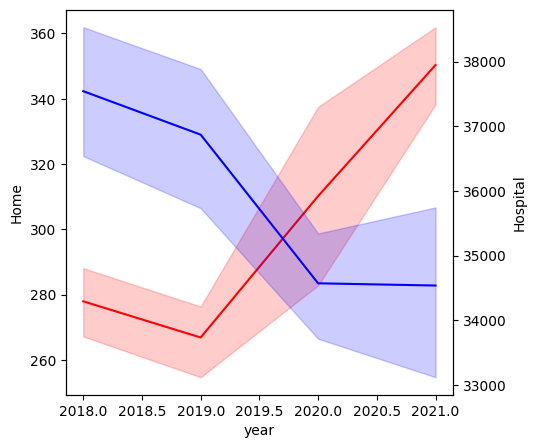

In [70]:
# show how place of the birth has been changed over years.

plot_df = bdf_place_based_clean.reset_index()

plt.figure(figsize=(5, 5))
sbn.lineplot(x=plot_df.year, y=plot_df.Home, color='r')
ax2=plt.twinx()
sbn.lineplot(x=plot_df.year, y=plot_df.Hospital, color='b', ax=ax2)

plt.show()


*Answer to research question:* Over the last 4 years, more women in CA prefer home-birth (red line) over the birth in hospitals (blue line). 

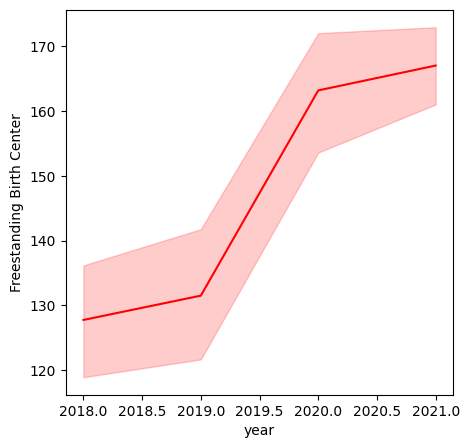

In [71]:
# How about birth in "Freestanding Birth Centers"?
plt.figure(figsize=(5, 5))
sbn.lineplot(x=plot_df.year, y=plot_df['Freestanding Birth Center'], color='r')
plt.show()

*Answer to research question:* Giving birth in "Freestanding birth centers" is also slightly increased. 

#### Research question: What is the statistics for death: based on place/gender?

In [72]:
plot_df = ddf_place_based_clean.reset_index()
plot_df.head(10)

strata_name,year,month,Decedent's Home,Emergency Room/Outpatient,Hospice Facility,Inpatient,Nursing Home/Long Term Care Facility,Other/Unknown
0,2014,1,8172,1519,383,7856,4297,1669
1,2014,2,6842,1304,314,6526,3590,1412
2,2014,3,7534,1336,355,6542,3846,1578
3,2014,4,7251,1287,349,6219,3625,1428
4,2014,5,7223,1249,369,6262,3708,1565
5,2014,6,6996,1236,358,5782,3565,1419
6,2014,7,7242,1304,373,5998,3493,1524
7,2014,8,7011,1235,359,5837,3528,1540
8,2014,9,7067,1209,357,5837,3385,1508
9,2014,10,7145,1346,407,6213,3544,1566


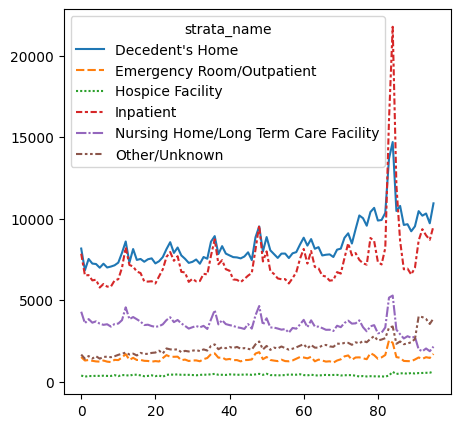

In [73]:
# visualize
names = plot_df.columns.to_list()[2:]
plt.figure(figsize=(5, 5))
sbn.lineplot(data=plot_df[names], )

plt.show()

*Answer to the research question* No any remarkable correlation found with the place of death.

In [74]:
plot_df = ddf_gender_based_clean.reset_index()
plot_df

strata_name,year,month,Female,Male
0,2014,1,11691,12205
1,2014,2,9768,10217
2,2014,3,10371,10819
3,2014,4,9722,10436
4,2014,5,9982,10392
...,...,...,...,...
91,2021,8,12292,14857
92,2021,9,12397,14935
93,2021,10,12584,14672
94,2021,11,11801,14067


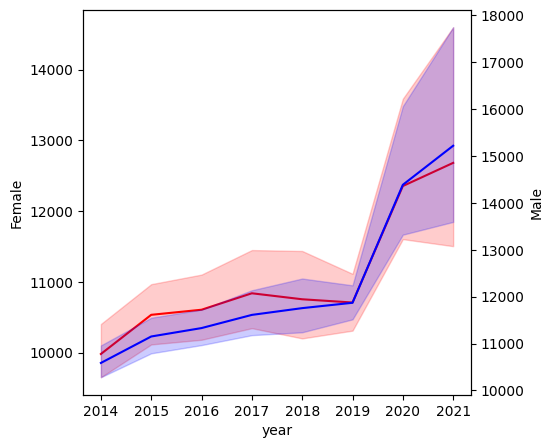

In [75]:
# plot the line for Female and Male
plt.figure(figsize=(5, 5))
sbn.lineplot(x=plot_df.year, y=plot_df.Female, color='r')
ax2=plt.twinx()
sbn.lineplot(x=plot_df.year, y=plot_df.Male, color='b', ax=ax2)

plt.show()

*Answer to the question* No any remarkable correlation; However, death count in both Male and Female is increased over years.

#### How birth and death statistics changed overtime? (last 8 years)

In [76]:
plot_df = merged_df.copy()
plot_df.head(10)

,year,month,birth_count,death_count
0,2014,1,41136,23896
1,2014,2,37415,19988
2,2014,3,40747,21191
3,2014,4,40003,20159
4,2014,5,41747,20376
5,2014,6,40550,19356
6,2014,7,44749,19934
7,2014,8,44943,19510
8,2014,9,45150,19363
9,2014,10,44024,20221


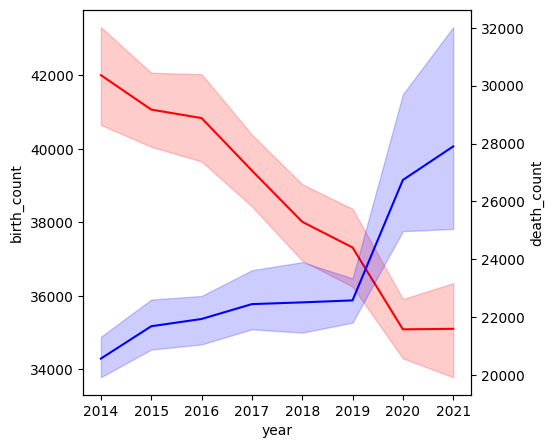

In [77]:
# Correlation between birth and death counts
plt.figure(figsize=(5, 5))
sbn.lineplot(x=plot_df.year, y=plot_df.birth_count, color='r')
ax2=plt.twinx()
sbn.lineplot(x=plot_df.year, y=plot_df.death_count, color='b', ax=ax2)

plt.show()

*Answer to the question:* Within the last 8 years, birth rate is decreasing (red) in CA, and simultaneously death rate is increasing (blue).

### **5.2:** Reflection
It was interesting project. I guess, I need some more study about reshaping of dataframes - differences between pivot and melt. Also, I will do some exercises on merging dataframes - concat, join, merge functions. 